In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set()
from sklearn.preprocessing import MinMaxScaler

In [4]:
data=pd.read_csv("/content/spotify.csv")

In [5]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [6]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [8]:
data.shape

(174389, 19)

In [9]:
df=data.drop(columns=['id','name','release_date','artists','year'])

In [10]:
df.head(2)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.991,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.634
1,0.643,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.950


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

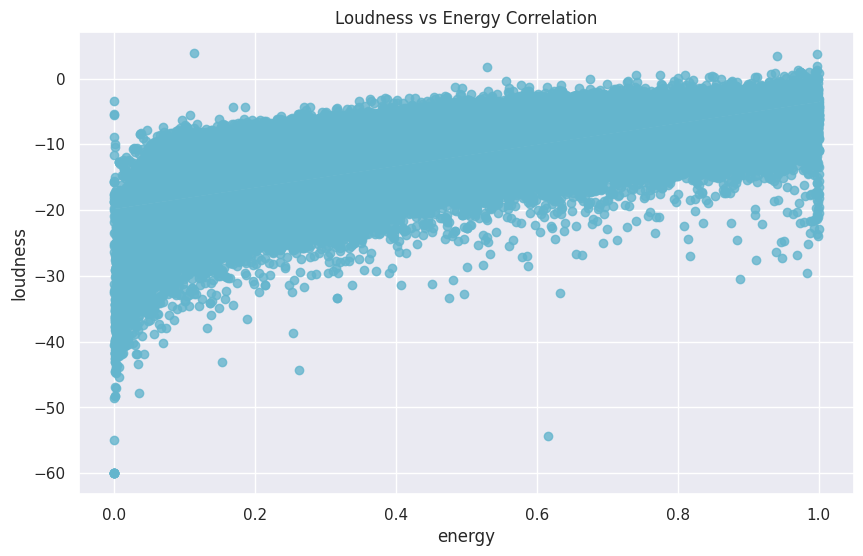

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='loudness', x='energy', color='c').set(title='Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

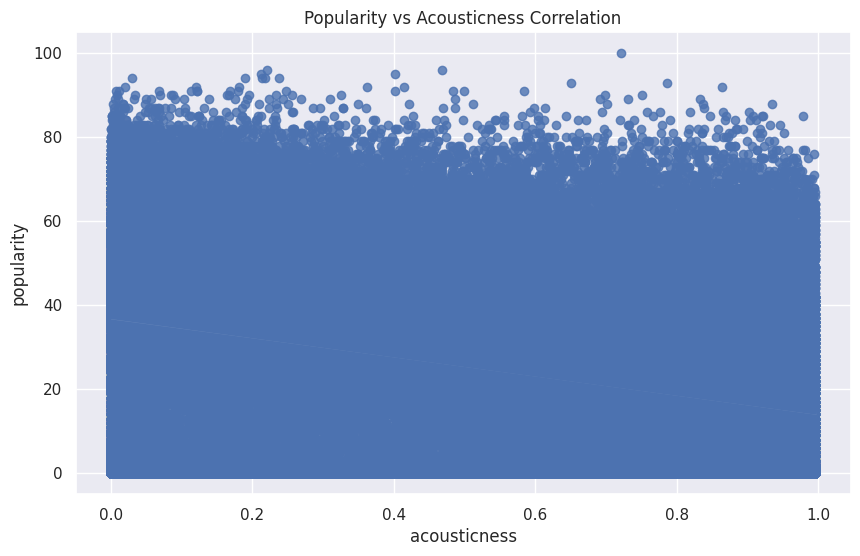

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y='popularity', x='acousticness', color='b').set(title='Popularity vs Acousticness Correlation')

In [14]:
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)

In [16]:
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0         1
1         1
2         1
3         8
4         1
         ..
174384    1
174385    1
174386    7
174387    7
174388    7
Name: features, Length: 174389, dtype: int32)

In [17]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

In [19]:
recommendations = Spotify_Recommendation(data)
recommendations.recommend("Keep A Song In Your Soul", 10)

100%|██████████| 174387/174387 [00:12<00:00, 13962.08it/s]


,artists,name
146838,['Alvin & The Chipmunks'],I Wish I Could Speak French
85493,['DEVO'],Praying Hands
60455,['Titi Botez'],O mia bella Napoli
46468,['Tennessee Ernie Ford'],"Just Before The Battle, Mother"
6426,['Nat King Cole'],It Could Happen To You - Remastered
101197,['The Beach Boys'],Don't Worry Baby
127187,['Makbule Enver Hanım'],Şu Kızı Bana Vermiyorlar
68546,['Neil Diamond'],"Acapulco - From ""The Jazz Singer"" Soundtrack"
104250,['Bronco'],La Regañona
27942,['Dion'],Donna the Prima Donna


In [21]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020,1
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,1
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020,7
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,7
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020,7


In [22]:
recommendations.recommend("champagne problems",10)

100%|██████████| 174385/174385 [00:09<00:00, 17739.56it/s]


,artists,name
34393,['Enrique Iglesias'],Si Tú Te Vas
19814,['Lil Uzi Vert'],Sanguine Paradise
153819,"['Mad CJ Mac', 'Poppa LQ']",Come and Take a Ride
141005,"['Claudio Moran', 'Los Universales']",Paloma Ajena
85127,['Thin Lizzy'],Jailbreak
74138,['Good Charlotte'],I Don't Wanna Be In Love (Dance Floor Anthem)
36754,['Good Charlotte'],I Don't Wanna Be In Love (Dance Floor Anthem)
115222,['Jack Jones'],I Wish You Love
74198,['A Day To Remember'],The Plot to Bomb the Panhandle
68762,['Juice Newton'],Break It To Me Gently
